# Ex 5. 
Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 \
neurons each and no activation functions, and another MLP Regressor with 2 hidden \
layers of 10 neurons each using ReLU activation functions. (Use `random_state=0` on the \
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

> average the performance of the models over 10 separate runs. In each \
> run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

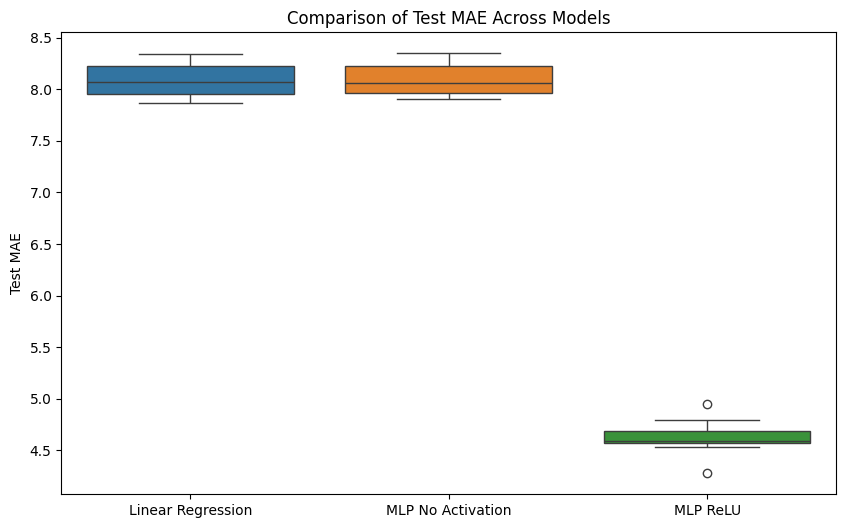

In [1]:
# Code for ex5

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parkinsons.csv')
X = df.drop(columns=['target'])  
y = df['target']

# Inicializar listas para armazenar os MAE de cada modelo
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Executar o ciclo de 10 iterações com divisões diferentes (random_state=i)
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Regressão Linear
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))

    # MLP sem funções de ativação
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0, max_iter=500)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_no_activation))

    # MLP com ReLU
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=2000)
    mlp_relu.fit(X_train, y_train)
    y_pred_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_relu))

# Criar um boxplot para comparar os resultados
data = [mae_linear, mae_mlp_no_activation, mae_mlp_relu]
labels = ['Linear Regression', 'MLP No Activation', 'MLP ReLU']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.ylabel('Test MAE')
plt.title('Comparison of Test MAE Across Models')
plt.show()


# Ex 6.
Compare a Linear Regression with a MLP with no activations, and explain the impact \
and the importance of using activation functions in a MLP. Support your reasoning with the \
results from the boxplots.

> Refer to the report for the explanation

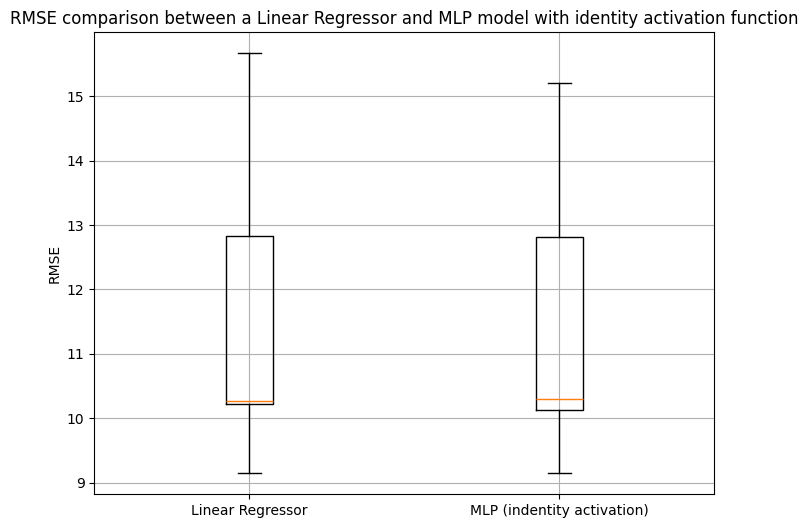

In [2]:
# Code for ex6
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create dataframe from parkinsons.csv
df = pd.read_csv('./parkinsons.csv', sep=',')

X = df.drop('target', axis=1) # Input variables
y = df['target'] # Target variable

# Create both models
lin_reg = LinearRegression()
mlp = MLPRegressor(activation='identity', random_state=0)

# Evaluate performance with 5-fold cross validation
lin_reg_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
mlp_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([lin_reg_scores * -1, mlp_scores * -1], tick_labels=['Linear Regressor', 'MLP (indentity activation)'])
plt.ylabel('RMSE')
plt.title('RMSE comparison between a Linear Regressor and MLP model with identity activation function')
plt.grid(True)
plt.show()

# Ex 7.
Using a 80-20 train-test split with `random_state=0`, use a Grid Search to tune the \
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The \
parameters to search over are: (i) L2 penalty, with the values $\{0.0001, 0.001, 0.01\}$; (ii) \
learning rate, with the values $\{0.001, 0.01, 0.1\}$; and (iii) batch size, with the values \
$\{32, 64, 128\}$. Plot the test MAE for each combination of hyperparameters, report the \
best combination, and discuss the trade-offs between the combinations.

> Refer to the report for the explanation

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  14.7s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  10.7s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  10.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.2s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   2.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.1s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.2s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.001; total time=   8.8s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.001; total time=  10.7s
[CV] END alpha=0.0001, batch_size=6

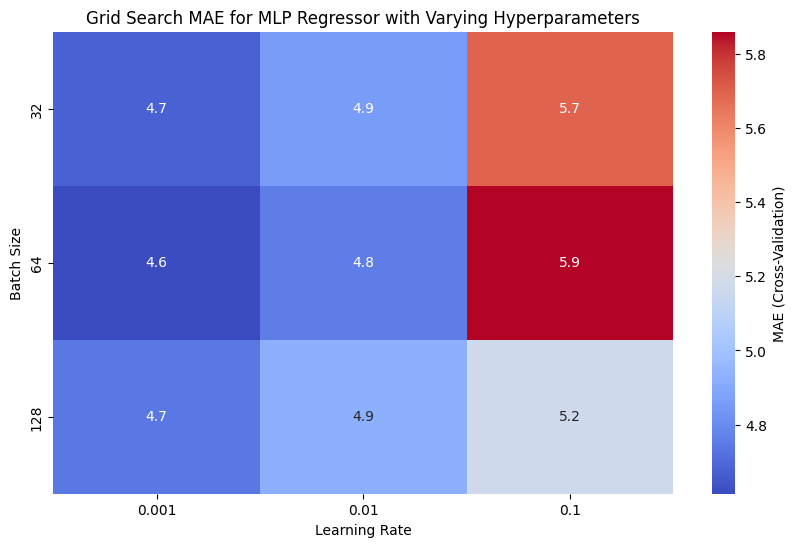

Best Hyperparameters: {'alpha': 0.0001, 'batch_size': 64, 'learning_rate_init': 0.001}
Test MAE with Best Parameters: 4.28353200597677


In [3]:
# Code for ex7
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
df = pd.read_csv('parkinsons.csv')

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['target'])  # Supondo que 'target' é a variável de saída
y = df['target']

# Dividir o conjunto de dados em treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir o modelo MLP com 2 camadas ocultas de 10 neurónios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir os hiperparâmetros para o GridSearch
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Penalidade L2
    'learning_rate_init': [0.001, 0.01, 0.1],  # Taxa de aprendizagem inicial
    'batch_size': [32, 64, 128]  # Tamanho do batch
}

# Criar o GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Previsões no conjunto de teste com o melhor modelo
y_pred = grid_search.predict(X_test)

# Calcular o MAE no conjunto de teste
test_mae = mean_absolute_error(y_test, y_pred)

# Obter os resultados da pesquisa de hiperparâmetros
results = pd.DataFrame(grid_search.cv_results_)

# Preparar os dados para o heatmap
results['mean_test_score'] = -results['mean_test_score']  # Tornar o erro positivo para interpretação

# Verificar se existem combinações repetidas
pivot_data = results.groupby(['param_batch_size', 'param_learning_rate_init'])['mean_test_score'].mean().reset_index()

# Criar a tabela pivô
pivot_table = pivot_data.pivot(index='param_batch_size', columns='param_learning_rate_init', values='mean_test_score')

# Plotar o heatmap dos resultados de validação cruzada
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'MAE (Cross-Validation)'})
plt.title('Grid Search MAE for MLP Regressor with Varying Hyperparameters')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_

# Resultados finais
print(f"Best Hyperparameters: {best_params}")
print(f"Test MAE with Best Parameters: {test_mae}")



